<div style="text-align:center; background-color:#F0F0F0; padding:0 px; border-radius:10px;">
  <h1 style="color:#336699;">Uber Lyft Price Prediction Model</h1>
</div>

## About DataSet
## Context

#### Uber and Lyft ride prices are not constant and are influenced by demand and supply. Factors such as time of day and weather impact ride demand. However, the dataset used in this project is simulated, as actual ride data is not publicly available.

## Content

#### Real-time data was collected using Uber and Lyft APIs, along with corresponding weather conditions. A custom Scala  application queried the APIs at regular intervals and stored the data in DynamoDB. Cab ride estimates were obtained every 5 minutes, and weather data was collected every hour.

#### The dataset covers approximately a week in November '18, including data collected during the application testing phase. It  includes various types of cabs, their prices, and surge information. Weather attributes like temperature, rain, and cloud cover are also included.

## Inspiration

#### The project aims to analyze ride-sharing prices and understand the factors driving demand. Questions include whether demand differs on Mondays versus Sundays at 9 am, if people avoid cabs on sunny days, and whether events like a Red Sox match impact ride demand. The dataset provided offers insights and opportunities for further analysis.

#### By condensing the text and adopting a concise format, the information is presented in a more accessible manner.

<hr>

<hr>

<center><h4>Importing libraries<h4></center>

In [1]:
# required Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


<center><h4>Importing the data<h4></center>

In [2]:
Uber_data = pd.read_csv('./cab_rides.csv')
Weather_data=pd.read_csv('./weather.csv')


In [3]:
# head of data
Uber_data.head().style.background_gradient(cmap='Blues')

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.440000,Lyft,1544952607890,North Station,Haymarket Square,5.000000,1.000000,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.440000,Lyft,1543284023677,North Station,Haymarket Square,11.000000,1.000000,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.440000,Lyft,1543366822198,North Station,Haymarket Square,7.000000,1.000000,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.440000,Lyft,1543553582749,North Station,Haymarket Square,26.000000,1.000000,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.440000,Lyft,1543463360223,North Station,Haymarket Square,9.000000,1.000000,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
# shape of 
Uber_data.shape


(693071, 10)

In [5]:
# data types
Uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


<center><h4>5 Point Summary<h4></center>

In [6]:
# describe
Uber_data.describe().style.background_gradient(cmap='Blues')

,distance,time_stamp,price,surge_multiplier
count,693071.000000,693071.000000,637976.000000,693071.000000
mean,2.189430,1544045709764.284668,16.545125,1.013870
std,1.138937,689192492.400428,9.324359,0.091641
min,0.020000,1543203646318.000000,2.500000,1.000000
25%,1.280000,1543443968356.500000,9.000000,1.000000
50%,2.160000,1543737477529.000000,13.500000,1.000000
75%,2.920000,1544827508976.500000,22.500000,1.000000
max,7.860000,1545160510943.000000,97.500000,3.000000


<center><h4>Checking null values<h4></center>

In [7]:
Uber_data.isnull().sum().sort_values(ascending=False)/len(Uber_data)

price               0.079494
distance            0.000000
cab_type            0.000000
time_stamp          0.000000
destination         0.000000
source              0.000000
surge_multiplier    0.000000
id                  0.000000
product_id          0.000000
name                0.000000
dtype: float64

<center><h4>Imputing null values Accordingly<h4></center>

<AxesSubplot:xlabel='price', ylabel='Count'>

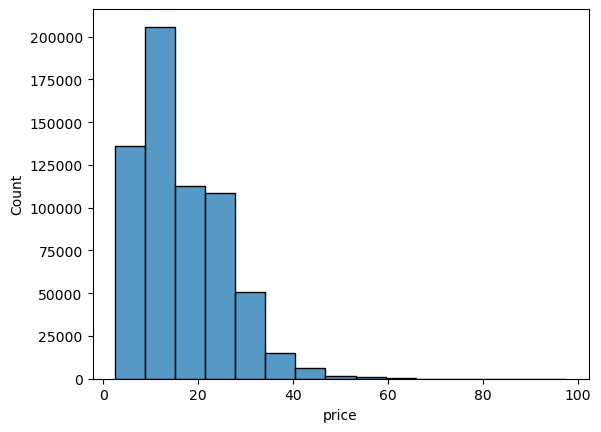

In [8]:
sns.histplot(Uber_data['price'],bins= 15)

In [9]:
Uber_data['price'].mean()

16.545125490614065

In [10]:
Uber_data['price'].mode()

0    7.0
Name: price, dtype: float64

In [11]:
Uber_data['price'].median()

13.5

In [12]:
Uber_data['price'].fillna(Uber_data['price'].mean(),inplace=True)

In [13]:
# checking after imputing
Uber_data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

<center><h4>Checking for Duplicates<h4></center>

In [14]:
# duplicates
Uber_data.duplicated().sum()

0

<center><h4>checking the second data set<h4></center>

In [15]:
# wheather data .head
Weather_data.head().style.background_gradient(cmap='Blues')

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.420000,Back Bay,1.000000,1012.140000,0.122800,1545003901,0.770000,11.250000
1,42.430000,Beacon Hill,1.000000,1012.150000,0.184600,1545003901,0.760000,11.320000
2,42.500000,Boston University,1.000000,1012.150000,0.108900,1545003901,0.760000,11.070000
3,42.110000,Fenway,1.000000,1012.130000,0.096900,1545003901,0.770000,11.090000
4,43.130000,Financial District,1.000000,1012.140000,0.178600,1545003901,0.750000,11.490000


In [16]:
#shape 
Weather_data.shape

(6276, 8)

In [17]:
# data types
Weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


<center><h4>5 point summary<h4></center>

In [18]:
Weather_data.describe().style.background_gradient(cmap='Blues')

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6276.000000,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1543857377.146431,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,665933.983457,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1543203644.000000,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1543386870.000000,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1543513974.000000,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1544690701.000000,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1545158702.000000,0.990000,18.180000


<center><h4>Checking for nulls<h4></center>

In [19]:
Weather_data.isnull().sum().sort_values(ascending=False)

rain          5382
temp             0
location         0
clouds           0
pressure         0
time_stamp       0
humidity         0
wind             0
dtype: int64

<center><h4>Imputation of null values<h4></center>

<AxesSubplot:xlabel='rain', ylabel='Count'>

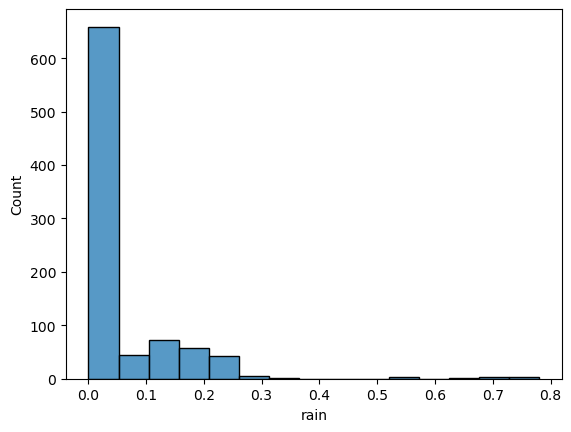

In [20]:
sns.histplot(Weather_data['rain'],bins=15)

In [21]:

Weather_data.rain.fillna(Weather_data.rain.mode(),inplace=True)


<center><h4>Converting Data Type of columns<h4></center>

In [22]:
from datetime import datetime, date
Uber_data['datetime']=pd.to_datetime(Uber_data['time_stamp'],unit='ms', infer_datetime_format=True)
Weather_data['date_time']=pd.to_datetime(Weather_data['time_stamp'],unit='s',infer_datetime_format=True)
Uber_data['Udate'] = Uber_data.datetime.dt.date
Weather_data['Wdate'] = Weather_data.date_time.dt.date

<hr>
<hr>

<center><h4>Merging the DataSet<h4></center>

In [23]:
# merge
UberWeather = pd.merge(Uber_data, Weather_data, how='inner', left_on=['Udate','destination'], right_on=['Wdate','location'])


<center><h4>5 Point Summary<h4></center>

In [24]:
# describe
UberWeather.head().style.background_gradient(cmap='Blues')

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,datetime,Udate,temp,location,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate
0,0.440000,Lyft,1544952607890,North Station,Haymarket Square,5.000000,1.000000,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000,2018-12-16,42.210000,North Station,1.000000,1012.160000,0.206900,1545003901,0.770000,11.370000,2018-12-16 23:45:01,2018-12-16
1,0.440000,Lyft,1544952607890,North Station,Haymarket Square,5.000000,1.000000,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000,2018-12-16,41.630000,North Station,0.440000,1023.680000,nan,1544924701,0.720000,6.240000,2018-12-16 01:45:01,2018-12-16
2,0.440000,Lyft,1544952607890,North Station,Haymarket Square,5.000000,1.000000,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000,2018-12-16,42.700000,North Station,0.170000,1023.050000,nan,1544921101,0.710000,6.400000,2018-12-16 00:45:01,2018-12-16
3,0.440000,Lyft,1544952607890,North Station,Haymarket Square,5.000000,1.000000,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000,2018-12-16,39.490000,North Station,0.450000,1023.970000,nan,1544935502,0.710000,7.210000,2018-12-16 04:45:02,2018-12-16
4,0.440000,Lyft,1544952607890,North Station,Haymarket Square,5.000000,1.000000,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000,2018-12-16,40.900000,North Station,0.400000,1024.500000,nan,1544928301,0.710000,6.350000,2018-12-16 02:45:01,2018-12-16


In [25]:
UberWeather.isnull().sum().sort_values(ascending=False)

rain                22436893
distance                   0
cab_type                   0
date_time                  0
wind                       0
humidity                   0
time_stamp_y               0
pressure                   0
clouds                     0
location                   0
temp                       0
Udate                      0
datetime                   0
name                       0
product_id                 0
id                         0
surge_multiplier           0
price                      0
source                     0
destination                0
time_stamp_x               0
Wdate                      0
dtype: int64

In [26]:
# Drop the column
UberWeather=UberWeather.drop('rain',1)

In [27]:
# columns
UberWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate'],
      dtype='object')

In [28]:
# shape
UberWeather.shape


(26729374, 21)

In [29]:
# info
UberWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26729374 entries, 0 to 26729373
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   distance          float64       
 1   cab_type          object        
 2   time_stamp_x      int64         
 3   destination       object        
 4   source            object        
 5   price             float64       
 6   surge_multiplier  float64       
 7   id                object        
 8   product_id        object        
 9   name              object        
 10  datetime          datetime64[ns]
 11  Udate             object        
 12  temp              float64       
 13  location          object        
 14  clouds            float64       
 15  pressure          float64       
 16  time_stamp_y      int64         
 17  humidity          float64       
 18  wind              float64       
 19  date_time         datetime64[ns]
 20  Wdate             object        
dtypes: dat

In [30]:
UberWeather.surge_multiplier = pd.to_numeric(UberWeather.surge_multiplier)

In [31]:
UberWeather.groupby('cab_type').count().head().style.background_gradient(cmap='Blues')

,distance,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,datetime,Udate,temp,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate
cab_type,,,,,,,,,,,,,,,,,,,,
Lyft,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653,11856653
Uber,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721,14872721


<center><h4>Sampling the Data<h4></center>

In [32]:
# taking a sample
UberWeather = UberWeather.sample(n=10000, random_state=12345)

In [33]:
# Adding columns
UberWeather['Wweek']=UberWeather.date_time.dt.day_of_week
UberWeather['Whour']=UberWeather.date_time.dt.hour

In [34]:
# columns in the samples
UberWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

<hr>

<hr>

<center><h3>Visualisations<h3></center>

##### source 

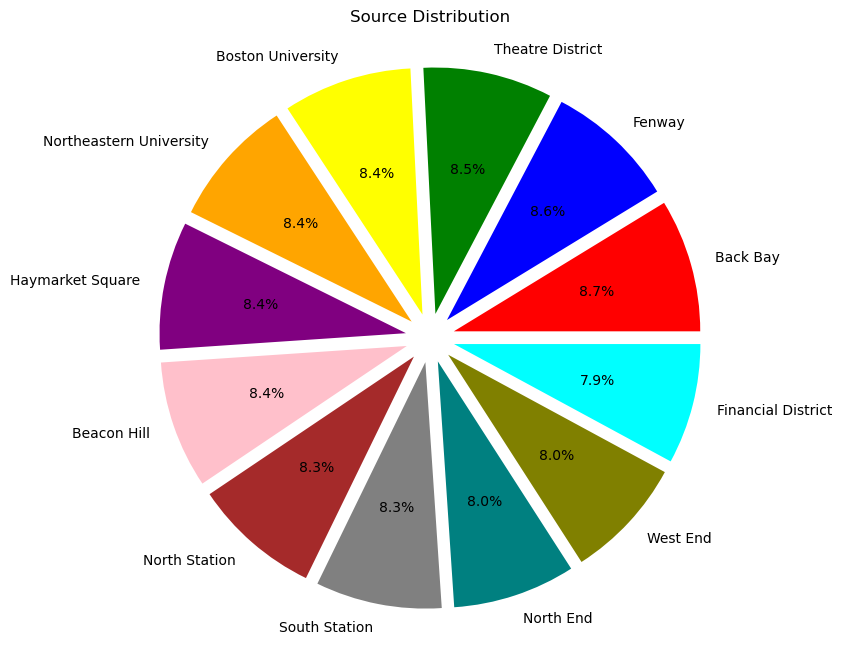

In [35]:
# Define the colors for the pie chart
palette = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'teal', 'olive', 'cyan']
# Get the counts and labels for the pie plot
counts = UberWeather['source'].value_counts().sort_values(ascending=False).values[:12]
labels = UberWeather['source'].value_counts().sort_values(ascending=False).index[:12]

# Define the explode parameter for exploded pie plot
explode = [0.1] * len(counts)  # Adjust the values for desired explosion

# Plot the exploded pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, explode=explode, colors=palette[:12], autopct='%1.1f%%')
plt.title('Source Distribution')
plt.show()

#### Observations 

- The largest source of data in the UberWeather dataset is Black Bay, accounting for 8.7% of the total data. This suggests that the weather data collected from Black Bay is more prevalent compared to other sources.

- The smallest source of data in the UberWeather dataset is the Financial District, representing only 7.9% of the total data. This indicates that the weather data from the Financial District is relatively scarce compared to other sources.

##### Destination 

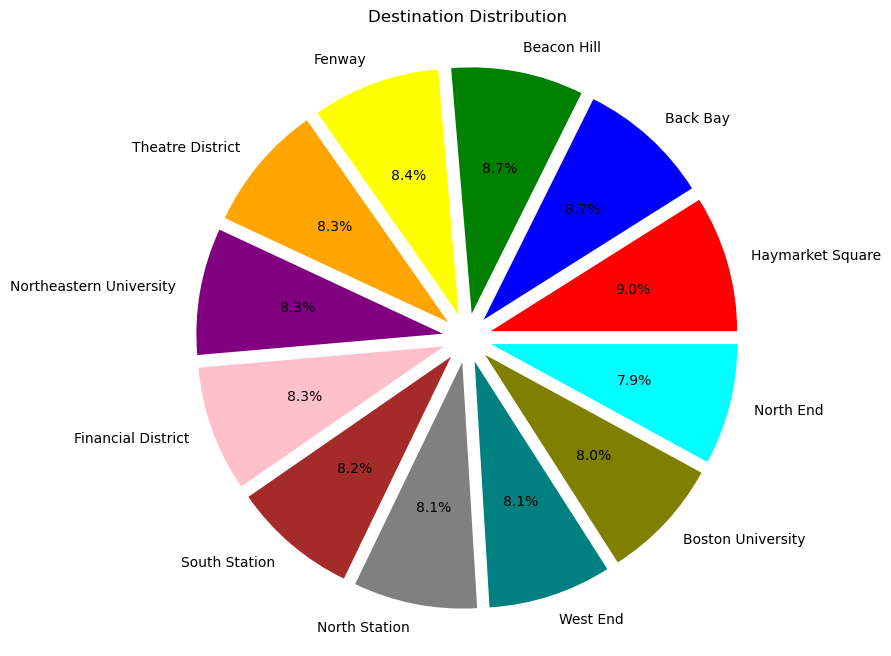

In [36]:
# Define the colors for the pie chart
palette = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'teal', 'olive', 'cyan']
# Get the counts and labels for the pie plot
counts = UberWeather['destination'].value_counts().sort_values(ascending=False).values[:12]
labels = UberWeather['destination'].value_counts().sort_values(ascending=False).index[:12]

# Define the explode parameter for exploded pie plot
explode = [0.1] * len(counts)  # Adjust the values for desired explosion

# Plot the exploded pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, explode=explode, colors=palette[:12], autopct='%1.1f%%')
plt.title('Destination Distribution')
plt.show()

#### Observations 

- The highest destination in the UberWeather dataset is Haymarket Square, accounting for 9.0% of the total destinations. This indicates that a significant portion of Uber rides in the dataset has Haymarket Square as the final destination.

- The lowest destination in the UberWeather dataset is the North End, representing a relatively smaller proportion of the total destinations. This suggests that Uber rides with the North End as the destination are less frequent compared to other destinations in the dataset.

##### Cab_Type Histogram

Text(0, 0.5, 'Frequency')

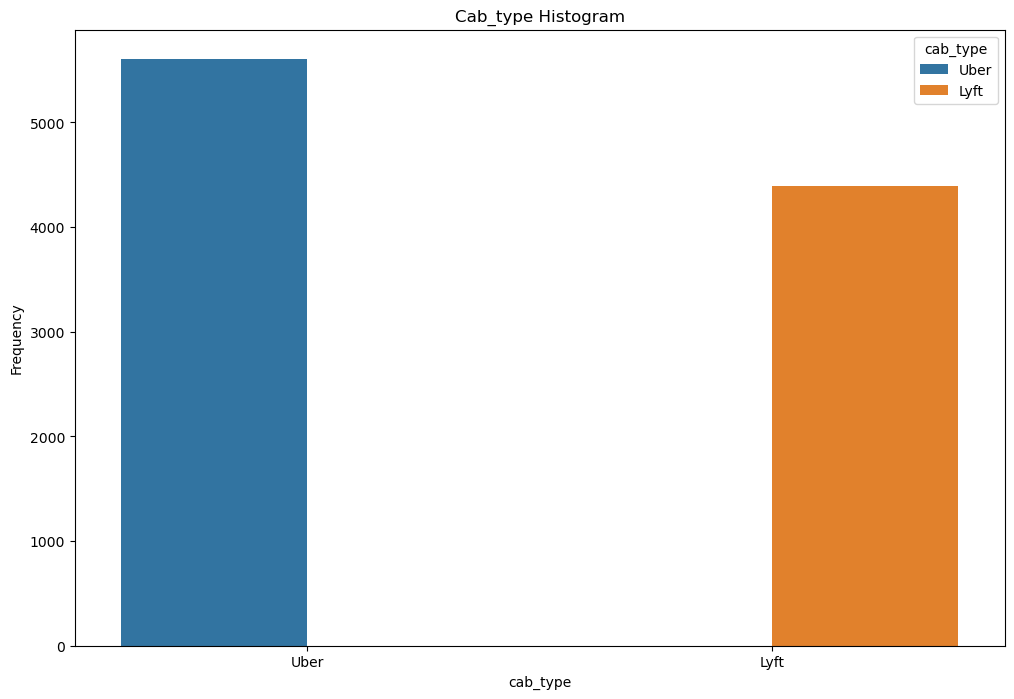

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(data=UberWeather,x='cab_type',hue='cab_type')
plt.title('Cab_type Histogram')
plt.xlabel('cab_type')
plt.ylabel('Frequency')

##### Other columns

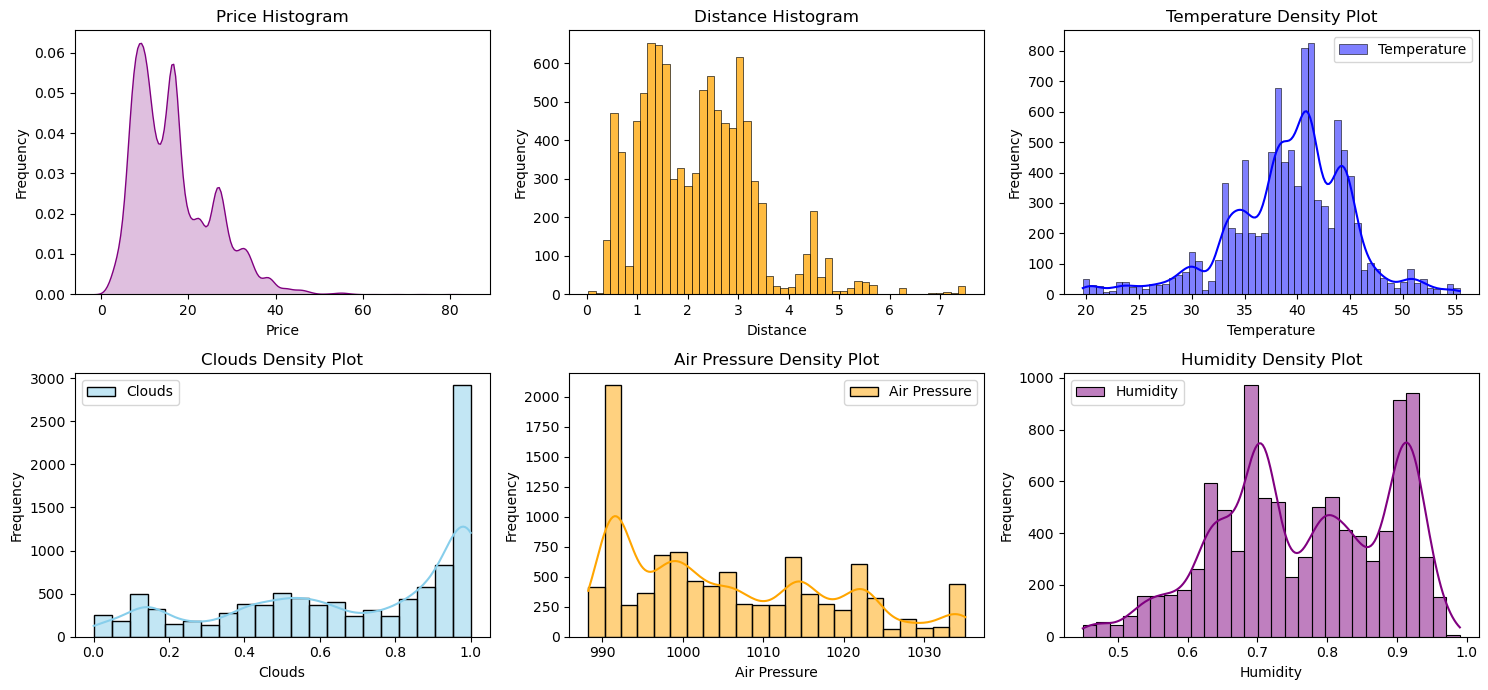

In [38]:
# Create a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(15, 7))

# Plot 1: Price Histogram
sns.kdeplot(data=UberWeather, x='price', color='purple', fill=True, ax=axs[0, 0])
axs[0, 0].set_title('Price Histogram')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Distance Histogram
sns.histplot(data=UberWeather, x='distance', color='orange', ax=axs[0, 1])
axs[0, 1].set_title('Distance Histogram')
axs[0, 1].set_xlabel('Distance')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Temperature Density Plot
sns.histplot(data=UberWeather, x='temp', color='blue', label='Temperature', kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Temperature Density Plot')
axs[0, 2].set_xlabel('Temperature')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].legend()

# Plot 4: Clouds Density Plot
sns.histplot(data=UberWeather, x='clouds', color='skyblue', label='Clouds', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Clouds Density Plot')
axs[1, 0].set_xlabel('Clouds')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

# Plot 5: Air Pressure Density Plot
sns.histplot(data=UberWeather, x='pressure', color='orange', label='Air Pressure', kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Air Pressure Density Plot')
axs[1, 1].set_xlabel('Air Pressure')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

# Plot 6: Humidity Density Plot
sns.histplot(data=UberWeather, x='humidity', color='purple', label='Humidity', kde=True, ax=axs[1, 2])
axs[1, 2].set_title('Humidity Density Plot')
axs[1, 2].set_xlabel('Humidity')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].legend()

# Adjust the spacing between subplots
plt.tight_layout()

#####   Demand on Different Days

##### Price variation By Hour of the Day

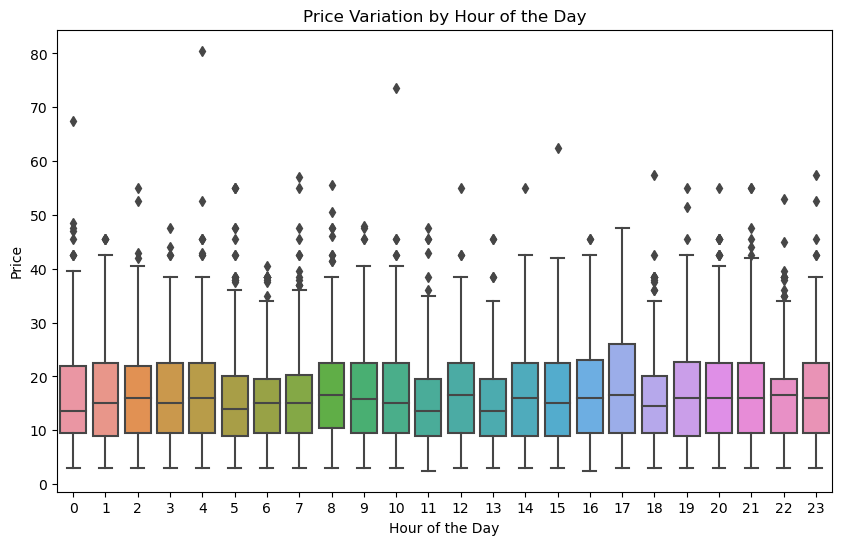

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=UberWeather, x='Whour', y='price')
plt.xlabel('Hour of the Day')
plt.ylabel('Price')
plt.title('Price Variation by Hour of the Day')
plt.show()

##### Average Price by hour of the Day

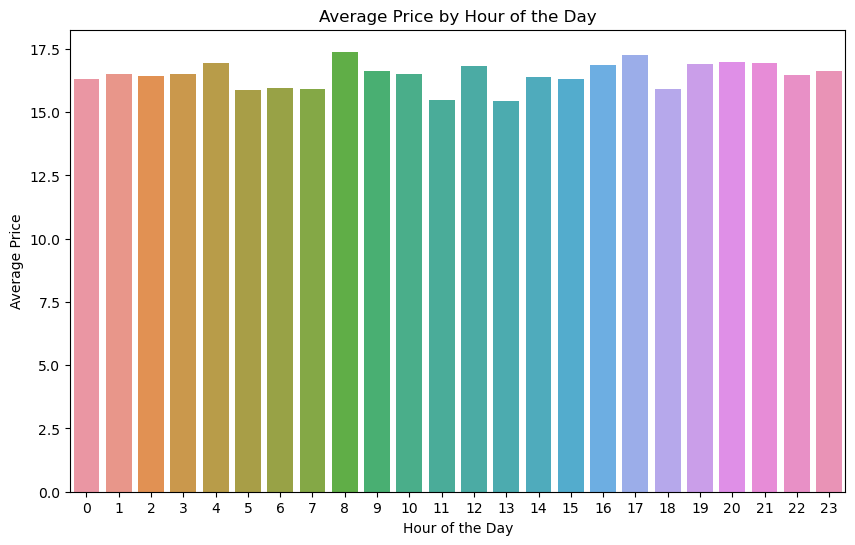

In [40]:
avg_price_by_hour = UberWeather.groupby('Whour')['price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_hour.index, y=avg_price_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.title('Average Price by Hour of the Day')
plt.show()

#### Observations 

- Peak Pricing during Rush Hours: The average price is significantly higher during 8 am and 5 pm, indicating a surge in demand during these hours. This observation suggests that there might be increased traffic and a higher number of ride requests during morning and evening rush hours, leading to higher prices.

- Consistent Pricing during Non-Rush Hours: For most of the day, the average prices remain relatively consistent and relatively lower compared to the peak hours. This suggests that the demand and competition among drivers are more balanced during these non-rush hours. Customers can expect more stable and affordable pricing during these times.

- Lower Pricing during Late Morning and Early Afternoon: The average prices are comparatively lower at 11 am and 1 pm. This observation suggests that there might be a relatively lower demand for rides during these hours, leading to lower prices. It could be a good time for customers to take advantage of lower fares if they have flexibility in their schedules.

##### Total Number of Rides by Day of the Week

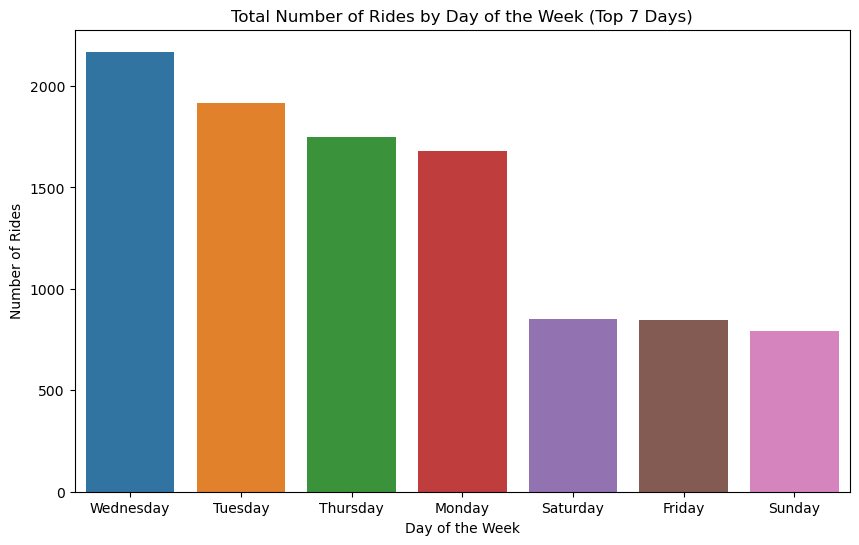

In [41]:


# Convert 'Wdate' column to datetime data type
UberWeather['Wdate'] = pd.to_datetime(UberWeather['Wdate'])

# Create a new column 'DayName' to store the names of the days
UberWeather['DayName'] = UberWeather['Wdate'].dt.day_name()

# Calculate the ride counts by day and sort them in descending order
ride_counts_by_day = UberWeather['DayName'].value_counts().sort_values(ascending=False)

# Select data for the 7 most frequent days
top_7_days = ride_counts_by_day[:7]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_7_days.index, y=top_7_days.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Total Number of Rides by Day of the Week (Top 7 Days)')
plt.show()

UberWeather.drop('DayName', axis=1, inplace=True)

#### Observations

- wendsday has the highest  followed by tuesday which is roughly 10 percent lesser followed by thursday and monday which are neck to neck and other 3 days are the least 50 percent lesser than monday and around 30 percent of wendsday give observationsWednesday has the highest number of rides: Wednesday shows the highest count among the top 7 days, indicating a higher demand for rides on this day. It suggests that Wednesday might be a busy day for Uber services, potentially influenced by factors such as midweek commuting or specific events occurring on Wednesdays.

- Tuesday has slightly fewer rides compared to Wednesday: Tuesday follows closely behind Wednesday in terms of the number of rides. It indicates a relatively high demand for rides on Tuesdays as well, although it is approximately 10% lower than that of Wednesday. This observation suggests that Tuesday is another popular day for Uber rides, possibly influenced by factors like work-related travel or weekday events.

- Thursday and Monday have similar ride counts: Thursday and Monday have similar numbers of rides, suggesting a relatively consistent demand on these days. While they are lower than Wednesday and Tuesday, they are still significant and indicate a considerable need for Uber rides on both days.

- The remaining three days have lower ride counts: Among the top 7 days, the remaining three days (Friday, Saturday, and Sunday) have lower ride counts compared to Wednesday, Tuesday, Thursday, and Monday. These days show around 50% fewer rides than Monday and approximately 30% of the ride count of Wednesday. This observation suggests that weekends may see a relatively lower demand for Uber rides, potentially due to different transportation habits or lower work-related travel.

##### Total Number of Rides by Time Period

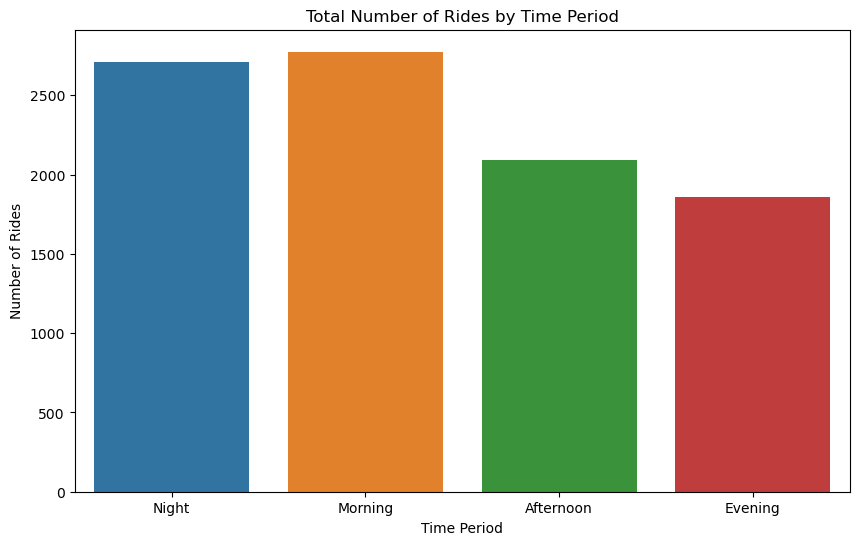

In [42]:
# Create a new column for time periods
UberWeather['TimePeriod'] = pd.cut(UberWeather['Whour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Calculate the ride counts by time period
ride_counts_by_time_period = UberWeather['TimePeriod'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=ride_counts_by_time_period.index, y=ride_counts_by_time_period.values)
plt.xlabel('Time Period')
plt.ylabel('Number of Rides')
plt.title('Total Number of Rides by Time Period')
plt.show()

#### Observations

- Morning has the highest number of rides: The morning time period shows the highest count among the four time periods (morning, night, afternoon, and evening). It indicates a higher demand for rides during the morning hours, which might be influenced by factors like commuting to work, school, or other early-morning activities.

- Night and afternoon have similar ride counts: The night and afternoon time periods have relatively similar numbers of rides, with the night being slightly higher. This suggests that there is a comparable demand for rides during these time periods, potentially driven by factors like nightlife activities, evening events, or people returning home from work or other engagements.

- Evening has the lowest number of rides: The evening time period shows the lowest count among the four time periods. It indicates a relatively lower demand for rides during the evening hours, possibly due to factors like people being settled at home, having fewer outings, or using alternative modes of transportation for their evening activities.

##### Number of Rides by Day of the Week and Time Period

<Figure size 1800x900 with 0 Axes>

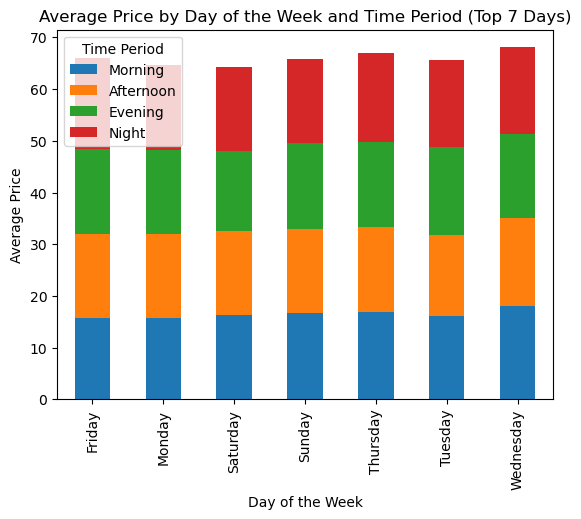

In [43]:
# Create a new column 'DayName' to store the names of the days
UberWeather['DayName'] = UberWeather['Wdate'].dt.day_name()
# Create a new column 'TimePeriod' to categorize the hours into time periods
UberWeather['TimePeriod'] = pd.cut(UberWeather['Whour'], bins=[0, 6, 12, 18, 24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])

# Calculate the average price by day and time period
avg_price_by_day_time = UberWeather.groupby(['DayName', 'TimePeriod'])['price'].mean().unstack()

# Reorder the time periods for better visualization
time_periods = ['Morning', 'Afternoon', 'Evening', 'Night']
avg_price_by_day_time = avg_price_by_day_time.reindex(columns=time_periods)

# Select data for the 7 most frequent days
top_7_days = avg_price_by_day_time[:7]

# Plot the grouped bar chart
plt.figure(figsize=(18,9 ))
top_7_days.plot(kind='bar', stacked=True)
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.title('Average Price by Day of the Week and Time Period (Top 7 Days)')
plt.legend(title='Time Period')
plt.show()

UberWeather.drop(['DayName', 'TimePeriod'], axis=1, inplace=True)

##### Scatter Plots of Wind vs. Price,Humidity vs. Price,Distance vs. Price,and Clouds vs. Price

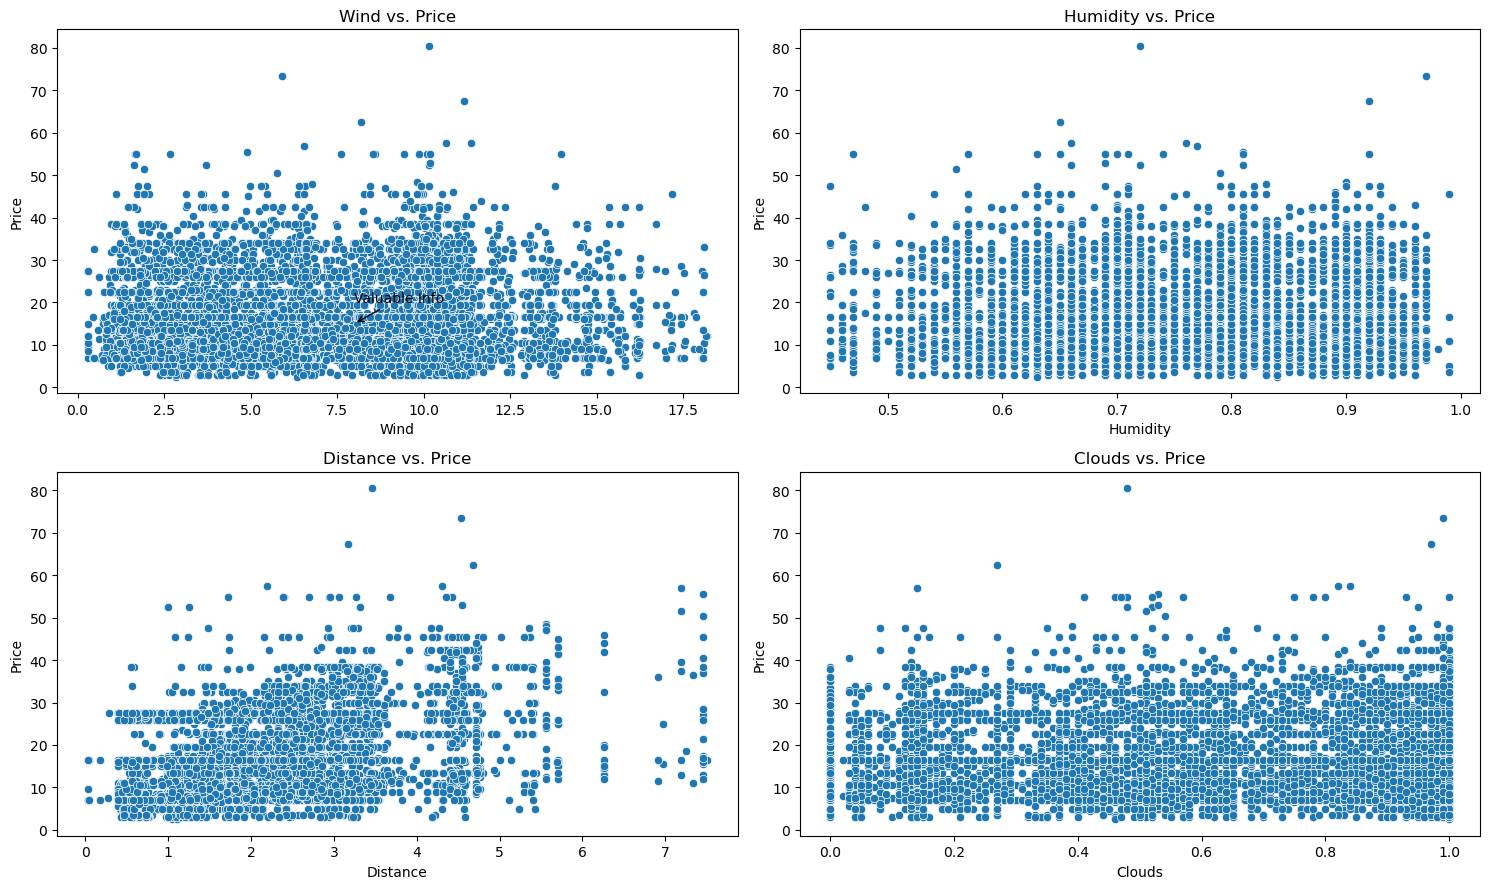

In [44]:
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15,9))

# Plot 1: Wind vs. Price
sns.scatterplot(data=UberWeather, x="wind", y="price", ax=axs[0, 0])
axs[0, 0].set_title('Wind vs. Price')
axs[0, 0].set_xlabel('Wind')
axs[0, 0].set_ylabel('Price')

# Plot 2: Humidity vs. Price
sns.scatterplot(data=UberWeather, x="humidity", y="price", ax=axs[0, 1])
axs[0, 1].set_title('Humidity vs. Price')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Price')

# Plot 3: Distance vs. Price
sns.scatterplot(data=UberWeather, x="distance", y="price", ax=axs[1, 0])
axs[1, 0].set_title('Distance vs. Price')
axs[1, 0].set_xlabel('Distance')
axs[1, 0].set_ylabel('Price')

# Plot 4: Clouds vs. Price
sns.scatterplot(data=UberWeather, x="clouds", y="price", ax=axs[1, 1])
axs[1, 1].set_title('Clouds vs. Price')
axs[1, 1].set_xlabel('Clouds')
axs[1, 1].set_ylabel('Price')

# Adjust the spacing between subplots
plt.tight_layout()

# Add additional information
axs[0, 0].annotate('Valuable Info', xy=(8, 15), xytext=(8, 20),
                   arrowprops=dict(facecolor='black', arrowstyle='->'))

# Display the subplot grid
plt.show()

## Insights

- Data Sources: The Black Bay source has the largest amount of data in the UberWeather dataset, accounting for 8.7% of the total data. On the other hand, the Financial District source represents the smallest proportion with only 7.9% of the data. This indicates that weather data from Black Bay is more prevalent compared to other sources.

- Destination Frequencies: Haymarket Square is the most common destination in the UberWeather dataset, representing 9.0% of the total destinations. In contrast, the North End is the least frequent destination, suggesting that rides to the North End are relatively less common compared to other destinations.

- Peak Pricing during Rush Hours: There is a noticeable price variation during peak hours, particularly during 8 am and 5 pm. This indicates surge pricing during morning and evening rush hours, suggesting higher demand and potentially increased traffic during these times.

- Pricing Stability during Non-Rush Hours: Outside of the peak hours, average prices remain relatively consistent and lower. This suggests that there is more balance in demand and competition among drivers during non-rush hours, resulting in more stable and affordable pricing for customers.

- Lower Pricing in Late Morning and Early Afternoon: Average prices are comparatively lower around 11 am and 1 pm. This observation indicates a relatively lower demand for rides during these hours, leading to lower prices. Customers who have flexibility in their schedules can take advantage of these lower fares during late morning and early afternoon.

- Day-wise Ride Counts: Among the top 7 days, Wednesday has the highest number of rides, followed closely by Tuesday. Thursday and Monday have similar ride counts, while Friday, Saturday, and Sunday have relatively lower ride counts. This suggests that Wednesday and Tuesday are the busiest days for Uber rides, while weekends experience lower demand.

- Time Period-wise Ride Counts: The morning time period has the highest number of rides, indicating a higher demand for rides during the early hours of the day. The night and afternoon time periods show comparable ride counts, while the evening time period has the lowest number of rides. This pattern suggests different usage patterns throughout the day, with morning and night being busier periods.

- Price Variation on Peak Hours for Different Days: There is a price variation during peak hours for different days. The highest pricing occurs during peak hours (8 am and 5 pm) for most days, indicating increased demand and surge pricing during these times.

##### Descriptive Statistics

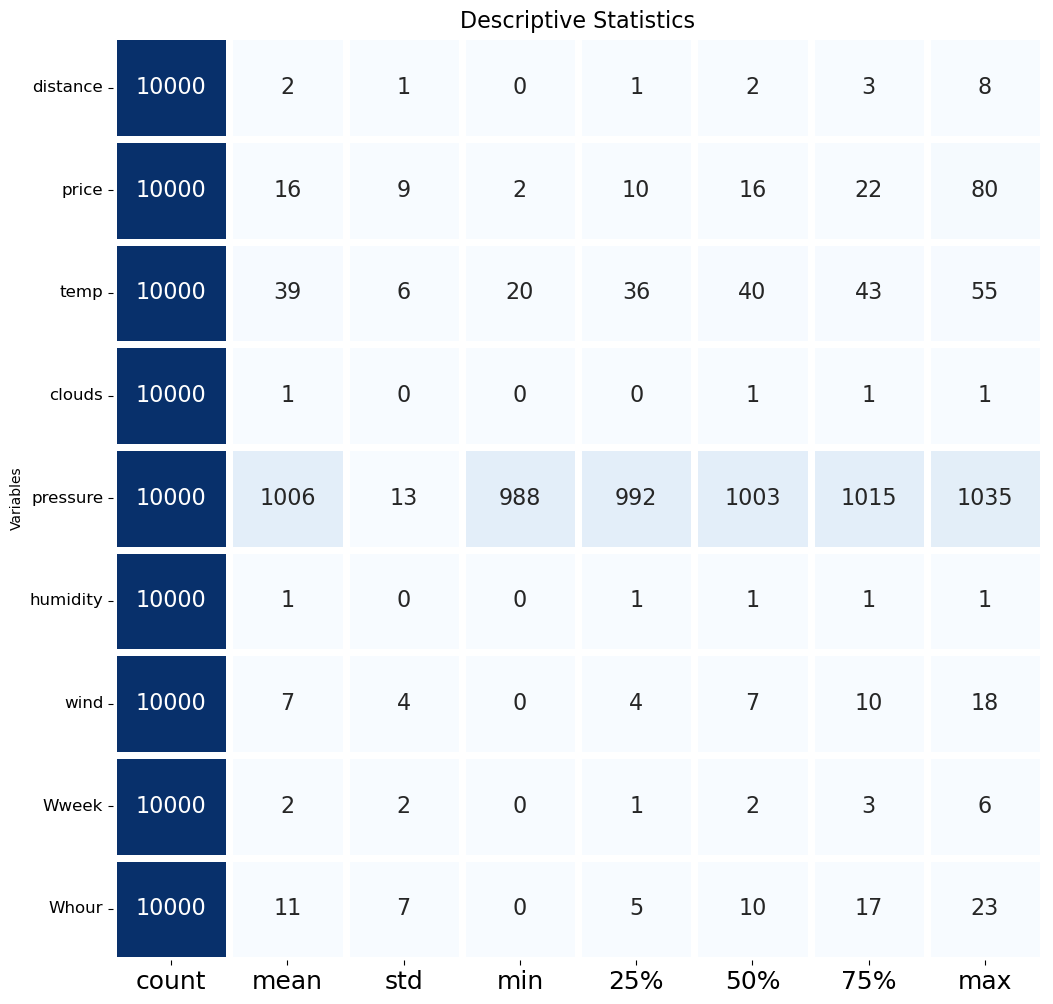

In [45]:
desc = UberWeather.describe().T
df1 = pd.DataFrame(index=['distance', 'price',
                          'temp', 'clouds', 'pressure', 'humidity', 'wind', 
                           'Wweek', 'Whour'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

<hr>

<hr>

<center><h3>Model Building<h3></center>

In [46]:
### Here we remove unwanted collumns for modeling. We remove columsn which have all values repeited and columns which have all distinct values.


UberMod = UberWeather.drop(['cab_type','time_stamp_x','id','product_id','datetime','Udate','time_stamp_y','date_time','Wdate'], axis=1)

In [47]:
UberMod.head().style.background_gradient(cmap='Blues')

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wweek,Whour
3552103,0.720000,Haymarket Square,West End,5.500000,1.000000,UberPool,42.490000,Haymarket Square,1.000000,1013.990000,0.740000,9.920000,6,20
26213543,0.630000,Financial District,South Station,11.000000,1.000000,Lyft XL,46.880000,Financial District,0.910000,1021.450000,0.870000,5.900000,5,9
6097439,2.320000,Fenway,Beacon Hill,10.500000,1.000000,UberX,38.740000,Fenway,0.750000,996.990000,0.700000,9.630000,3,0
5070778,0.550000,South Station,Theatre District,16.545125,1.000000,Taxi,35.840000,South Station,0.200000,1023.750000,0.810000,1.390000,6,1
21984724,1.210000,North End,Financial District,7.000000,1.000000,UberX,34.970000,North End,0.140000,991.540000,0.790000,6.540000,2,7


<center><h3>Label Encoding <h3></center>

In [48]:
le=LabelEncoder()

UberMod.destination = le.fit_transform(UberMod.destination)

UberMod.source = le.fit_transform(UberMod.source)

UberMod.name = le.fit_transform(UberMod.name)

UberMod.location = le.fit_transform(UberMod.location)



<center><h3>One HoT Encoding <h3></center>

In [49]:
# Perform one-hot encoding on the extracted components
onehot_encoder = OneHotEncoder(sparse=False)
encoded_columns = onehot_encoder.fit_transform(UberMod[['Wweek', 'Whour']])

In [50]:
x = UberMod.drop(['price'], axis=1)

In [51]:
y=UberMod['price']

In [52]:
x.head().style.background_gradient(cmap='Blues')

,distance,destination,source,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wweek,Whour
3552103,0.720000,5,11,1.000000,9,42.490000,5,1.000000,1013.990000,0.740000,9.920000,6,20
26213543,0.630000,4,9,1.000000,6,46.880000,4,0.910000,1021.450000,0.870000,5.900000,5,9
6097439,2.320000,3,1,1.000000,10,38.740000,3,0.750000,996.990000,0.700000,9.630000,3,0
5070778,0.550000,9,10,1.000000,8,35.840000,9,0.200000,1023.750000,0.810000,1.390000,6,1
21984724,1.210000,6,4,1.000000,10,34.970000,6,0.140000,991.540000,0.790000,6.540000,2,7


In [53]:
y

3552103      5.500000
26213543    11.000000
6097439     10.500000
5070778     16.545125
21984724     7.000000
              ...    
6067882     42.000000
10047366    22.500000
722456       7.500000
1335467      7.000000
2911388     15.500000
Name: price, Length: 10000, dtype: float64

<center><h3>Train Test Split And Scaling <h3></center>

In [54]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Fit the scaler on the training set
scaler = MinMaxScaler()
scaler.fit(X_train)

# Apply the scaler to transform the training set
X_train_scaled = scaler.transform(X_train)

# Apply the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)

<center><h3>Linear Regression Model<h3></center>

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mse

42.18510175095758

In [56]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_mse

41.41116195191556

In [57]:

train_r2 = r2_score(y_train, y_train_pred)
train_r2

0.46708155776457694

In [58]:
test_r2 = r2_score(y_test, y_test_pred)
test_r2


0.458305031734071

<center><h3>Ploting Actual Vs Predicted<h3></center>

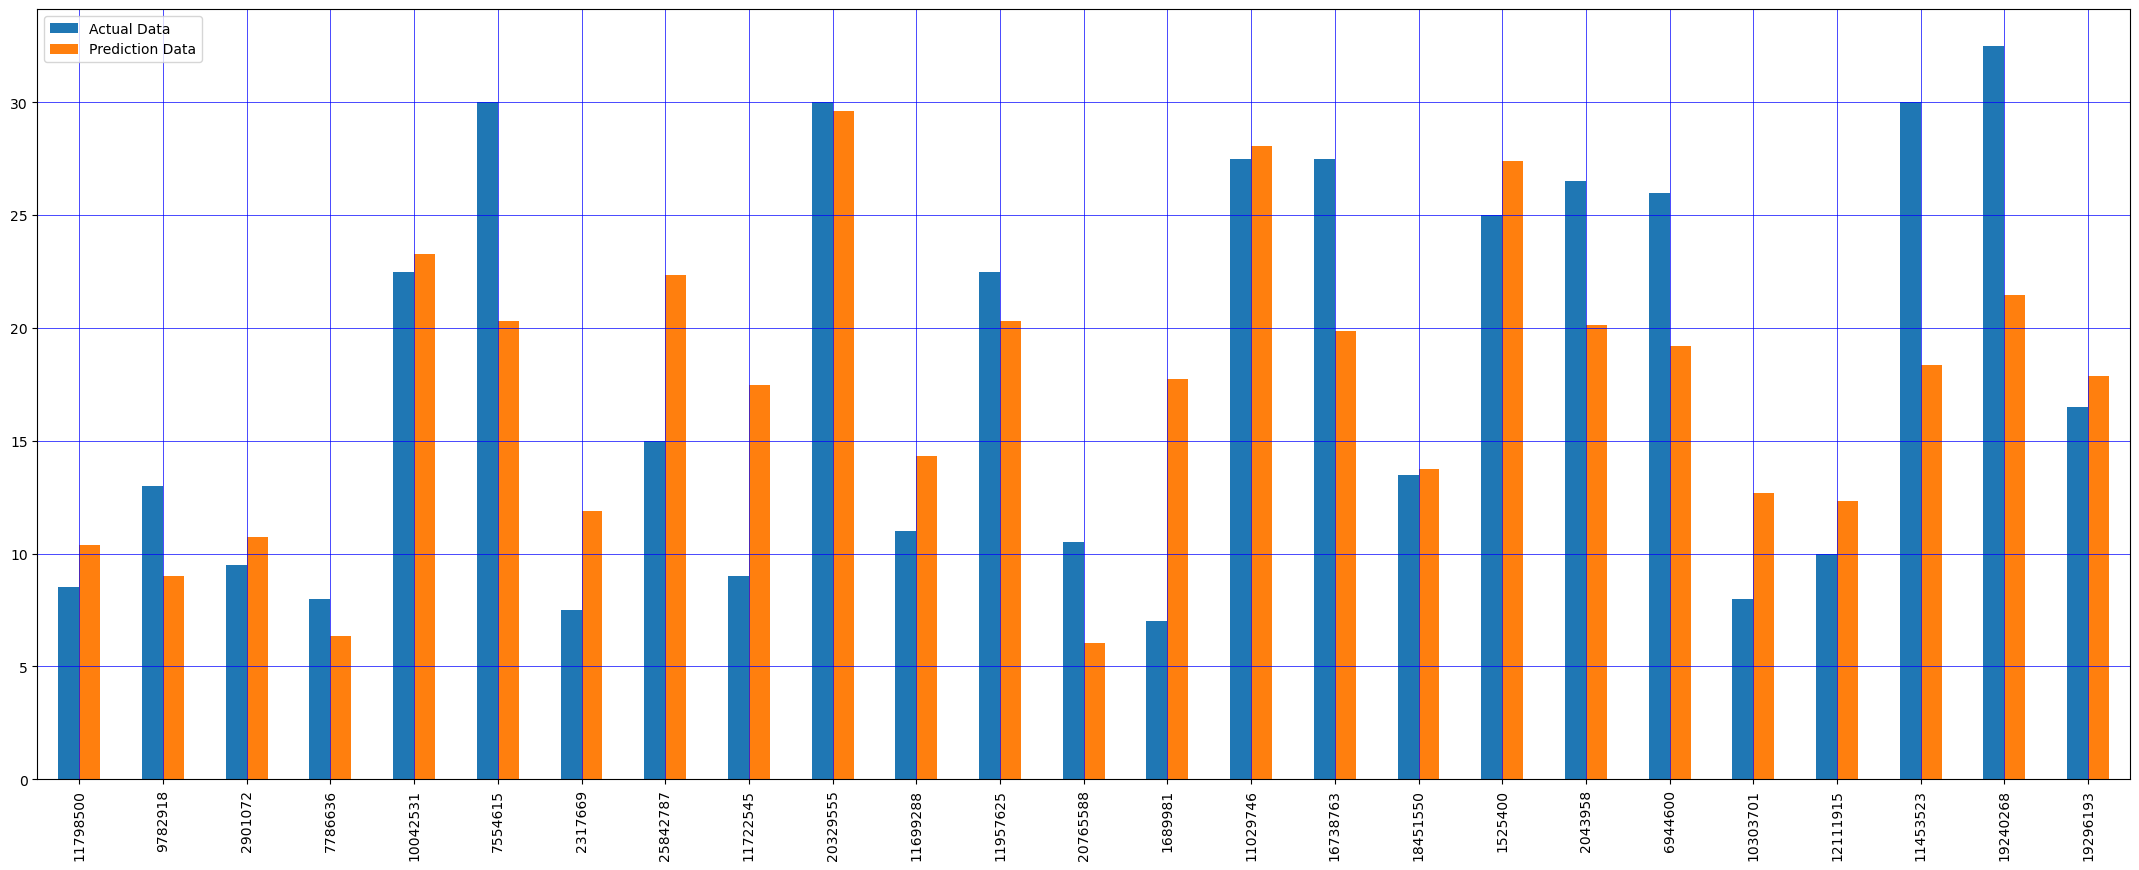

In [59]:
# Create a DataFrame with actual and predicted data for the first 25 instances in the test set
data = pd.DataFrame({'Actual Data': y_test[:25], 'Prediction Data': y_test_pred[:25]})

# Plot the bar chart
data.plot(kind='bar', figsize=(27, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<center><h2>Tying Different Models and Hyper parameter Tunning<h2></center>

<center><h3>Lasso Regression with Grid Search CV<h3></center>

In [60]:


# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization parameter
    'max_iter': [1000, 2000, 5000]  # Maximum number of iterations
}

# Create the Lasso regression model
lasso_model = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate the MSE and R-squared scores
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

MSE (Train): 43.45876813897997
MSE (Test): 42.276717934191154
R-squared (Train): 0.45099150987421954
R-squared (Test): 0.44698278675829406


<center><h3>Ploting Actual Vs Predicted<h3></center>

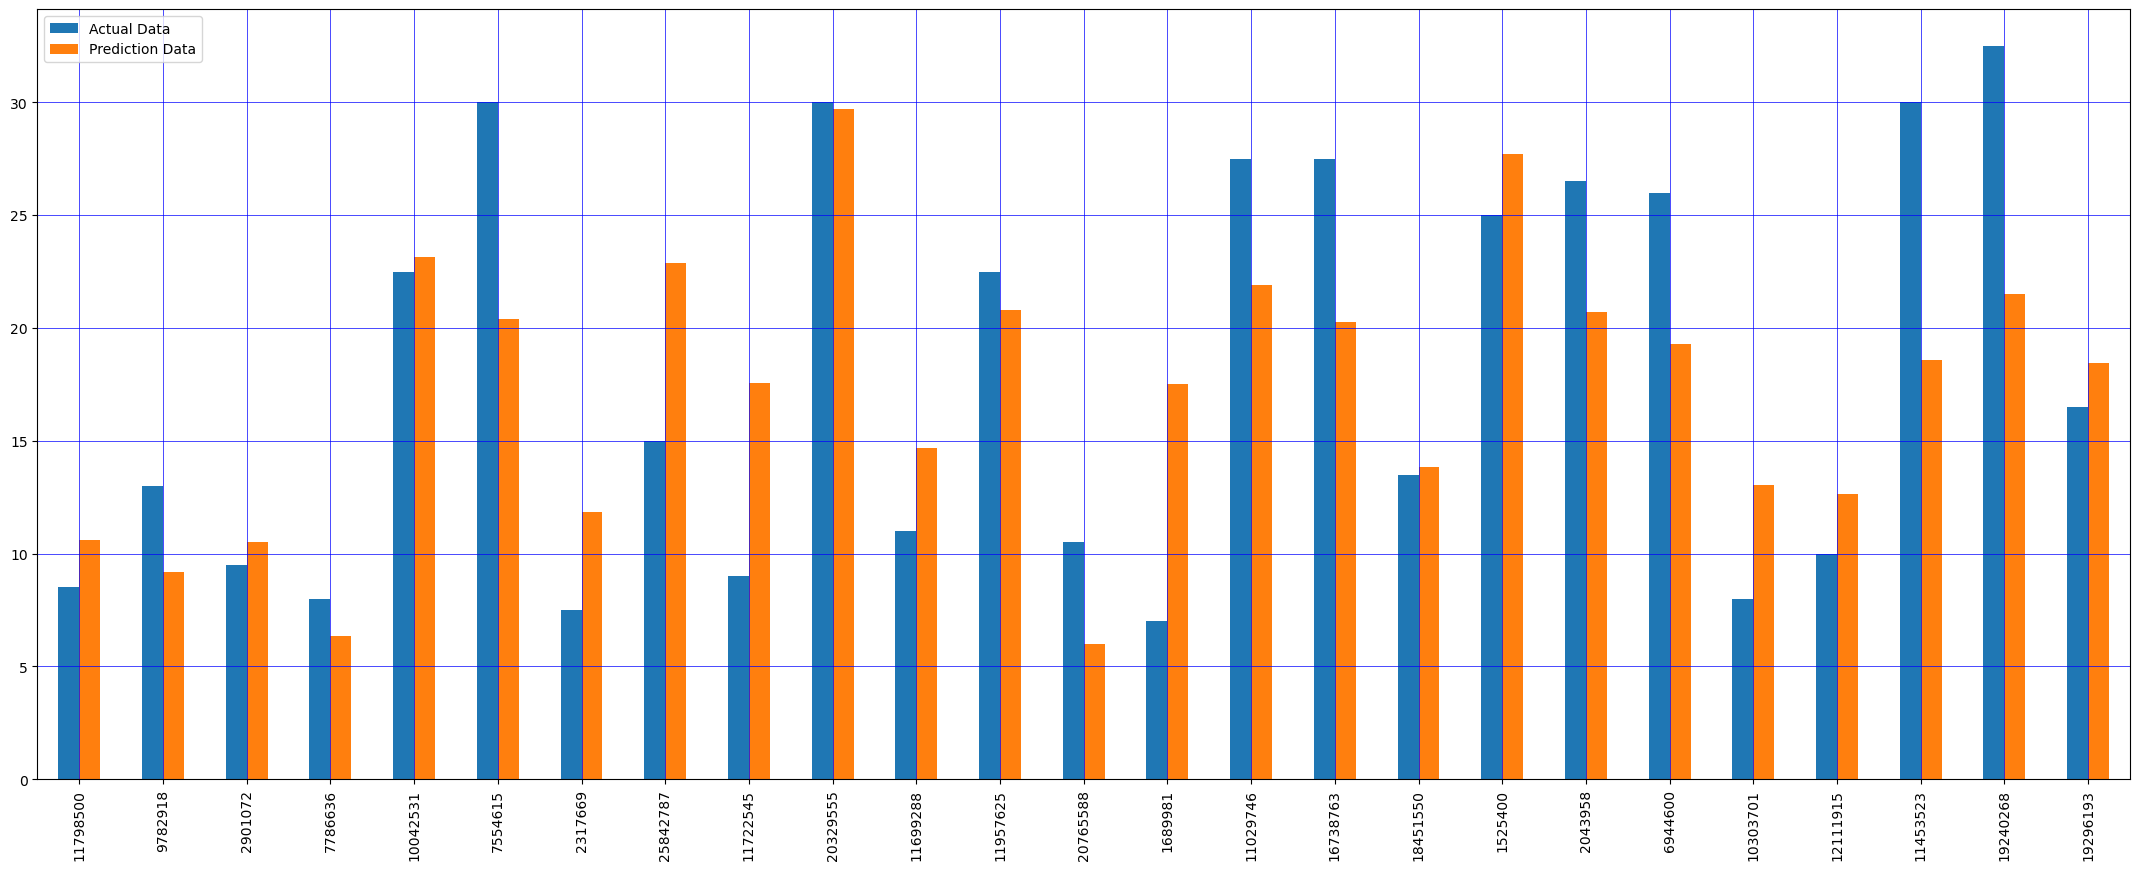

In [61]:
# Create a DataFrame with actual and predicted data for the first 25 instances in the test set
data = pd.DataFrame({'Actual Data': y_test[:25], 'Prediction Data': y_test_pred[:25]})

# Plot the bar chart
data.plot(kind='bar', figsize=(27, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<center><h3>HyperParameter tunning for Lasso Model<h3></center>

In [62]:
# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0],  # Regularization parameter
    'max_iter': [1000, 2000, 5000]  # Maximum number of iterations
}

# Create the Lasso regression model
lasso_model = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate the MSE and R-squared scores
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

MSE (Train): 42.20250486459467
MSE (Test): 41.412291996587804
R-squared (Train): 0.4668617066838737
R-squared (Test): 0.4582902497409074


<center><h3>Ploting Actual Vs Predicted<h3></center>

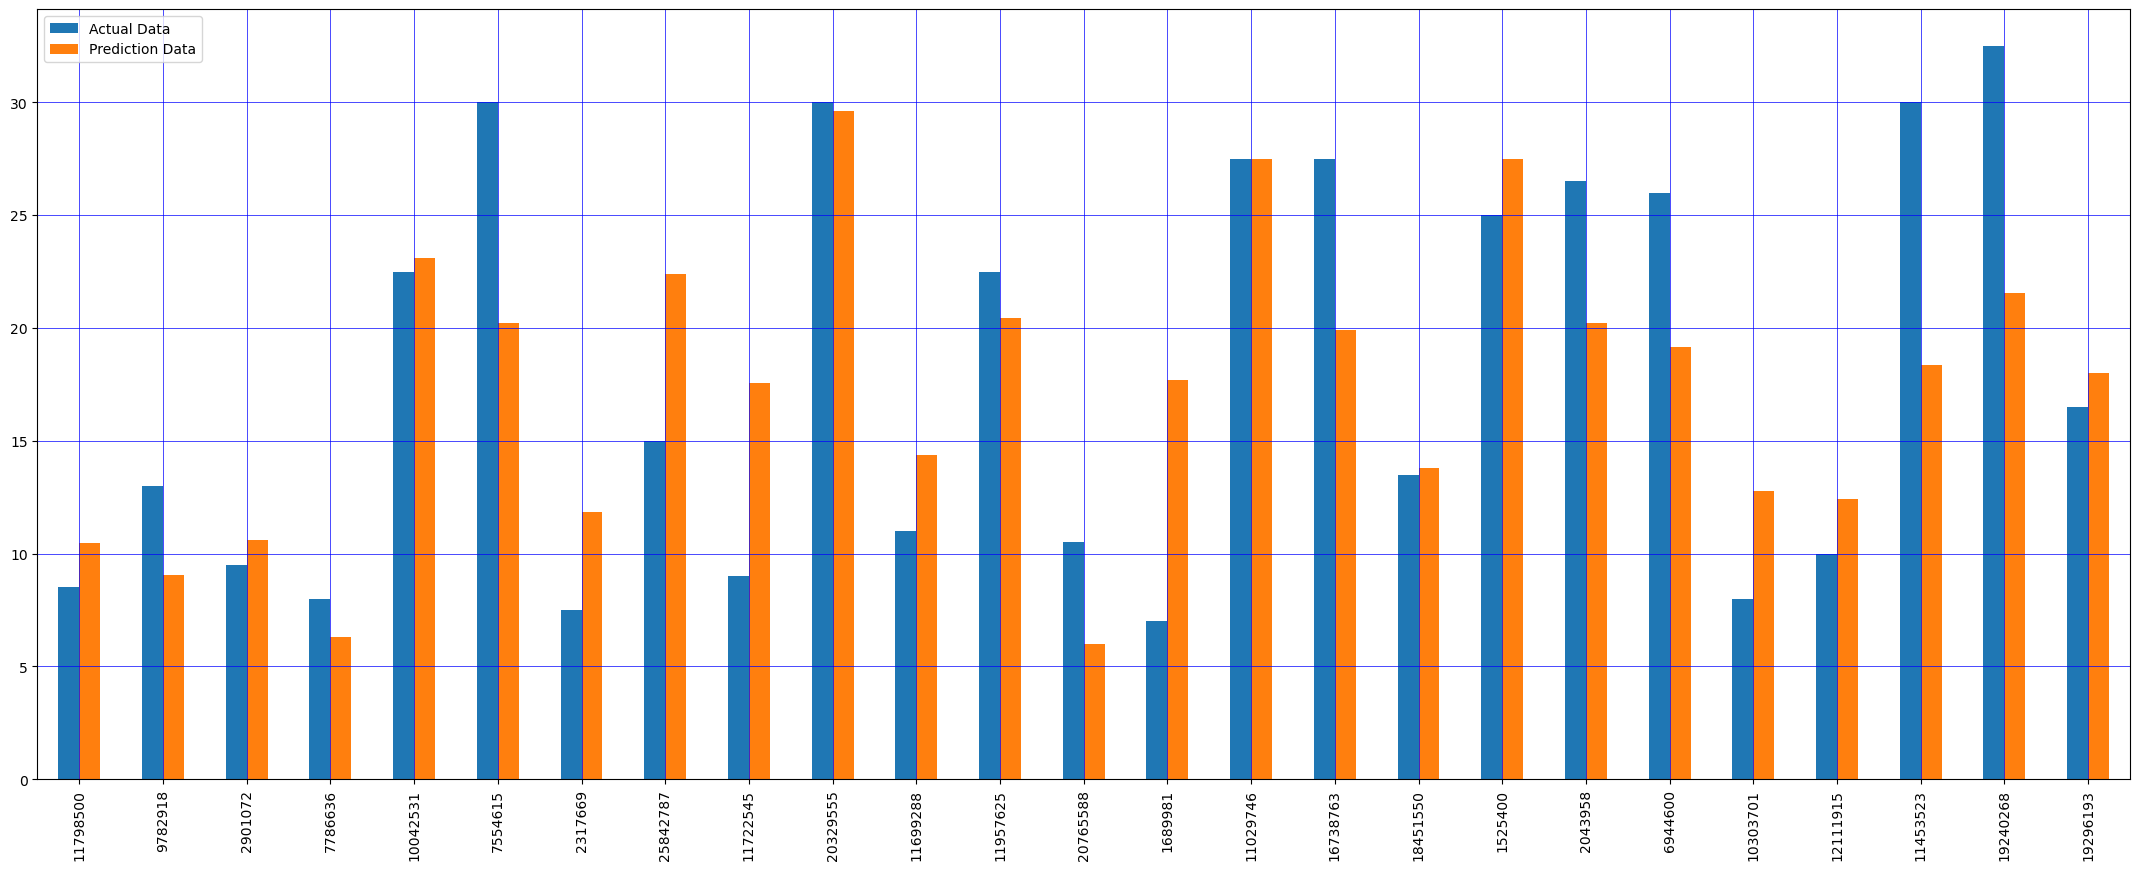

In [63]:
# Create a DataFrame with actual and predicted data for the first 25 instances in the test set
data = pd.DataFrame({'Actual Data': y_test[:25], 'Prediction Data': y_test_pred[:25]})

# Plot the bar chart
data.plot(kind='bar', figsize=(27, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<center><h3>HyperParameter tunning for Lasso Model<h3></center>

In [64]:
# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0,0.5,1.5,2,2.5,2,2,8,7,6,11,14],  # Regularization parameter
    'max_iter': [1000, 2000, 5000]  # Maximum number of iterations
}

# Create the Lasso regression model
lasso_model = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate the MSE and R-squared scores
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

MSE (Train): 42.20250486459467
MSE (Test): 41.412291996587804
R-squared (Train): 0.4668617066838737
R-squared (Test): 0.4582902497409074


<center><h3>Ploting Actual Vs Predicted<h3></center>

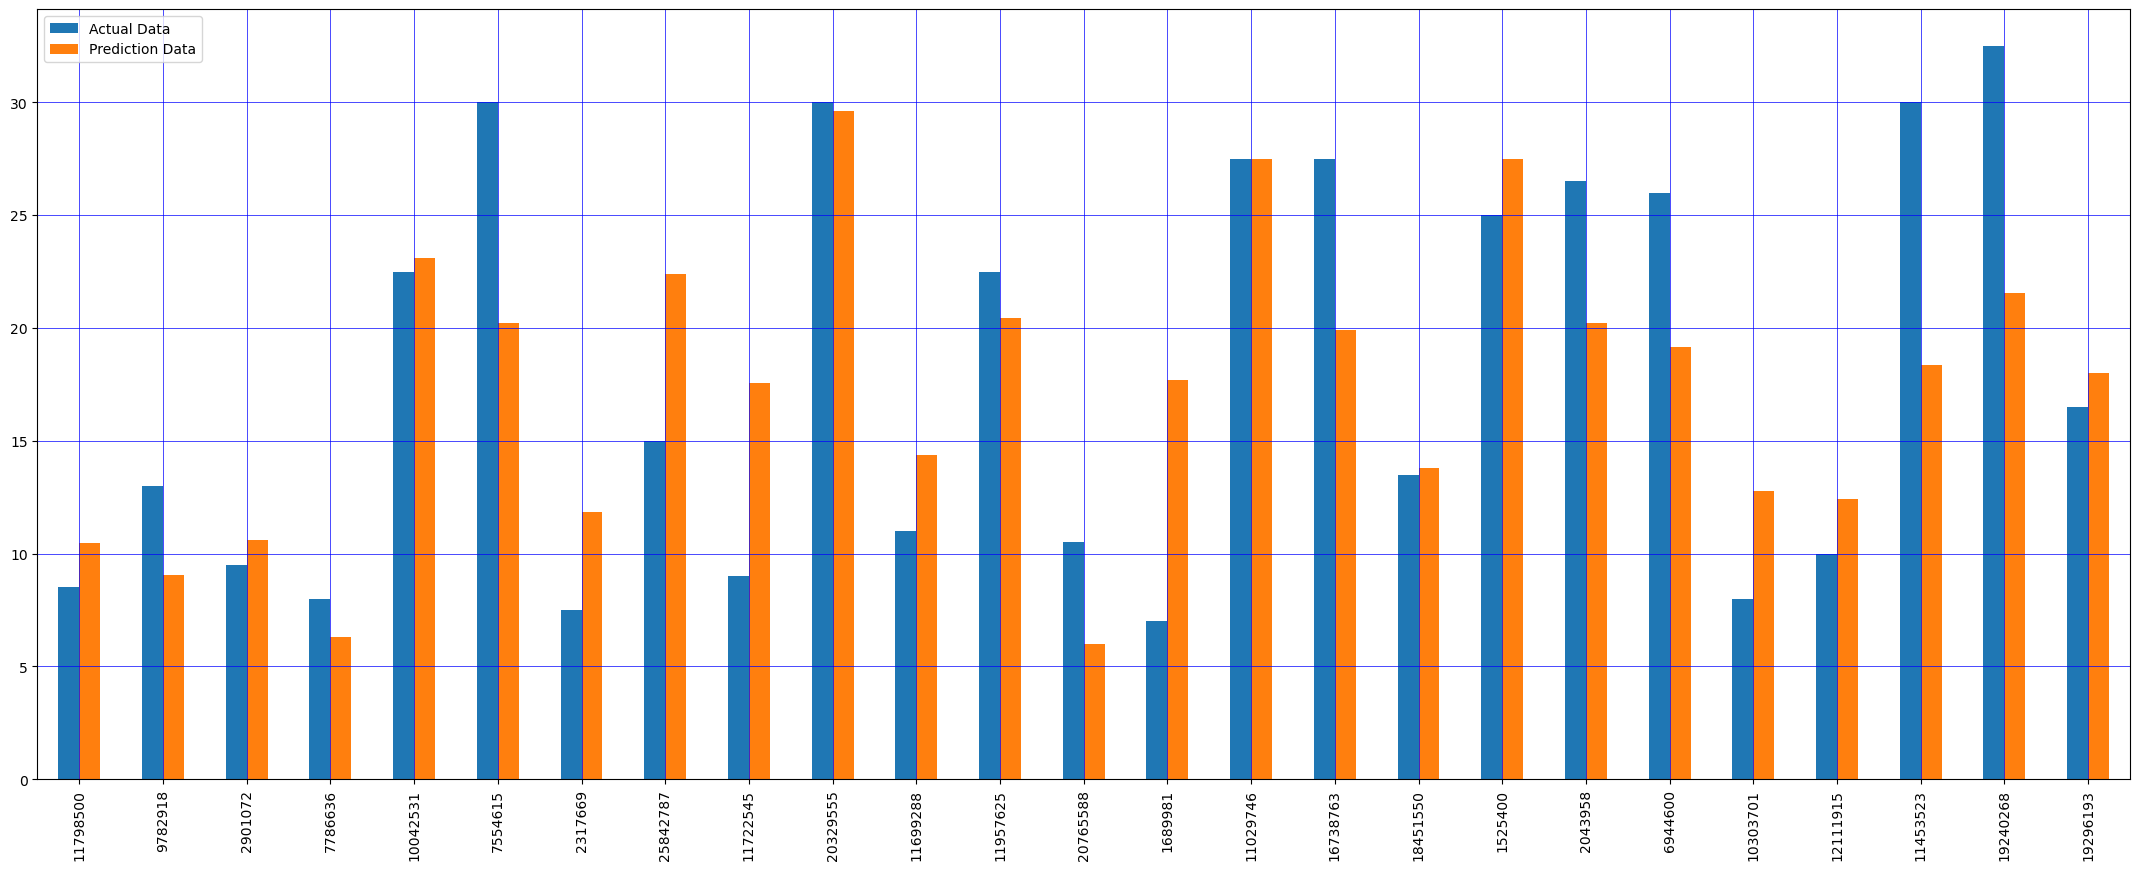

In [65]:
# Create a DataFrame with actual and predicted data for the first 25 instances in the test set
data = pd.DataFrame({'Actual Data': y_test[:25], 'Prediction Data': y_test_pred[:25]})

# Plot the bar chart
data.plot(kind='bar', figsize=(27, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<center><h3>HyperParameter tunning for Lasso Model<h3></center>

In [66]:
# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0,0.5,1.5,2,2.5,2,2,8,7,6,11,14],  # Regularization parameter
    'max_iter': [1000, 2000, 5000]  # Maximum number of iterations
}

# Create the Lasso regression model
lasso_model = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate the MSE and R-squared scores
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

MSE (Train): 42.20250486459467
MSE (Test): 41.412291996587804
R-squared (Train): 0.4668617066838737
R-squared (Test): 0.4582902497409074


<center><h3>Ridge Model and Ploting Actual Vs Predicted Values<h3></center>

MSE (Train): 42.18591099242086
MSE (Test): 41.40989586301852
R-squared (Train): 0.46707133473127604
R-squared (Test): 0.45832159330714883


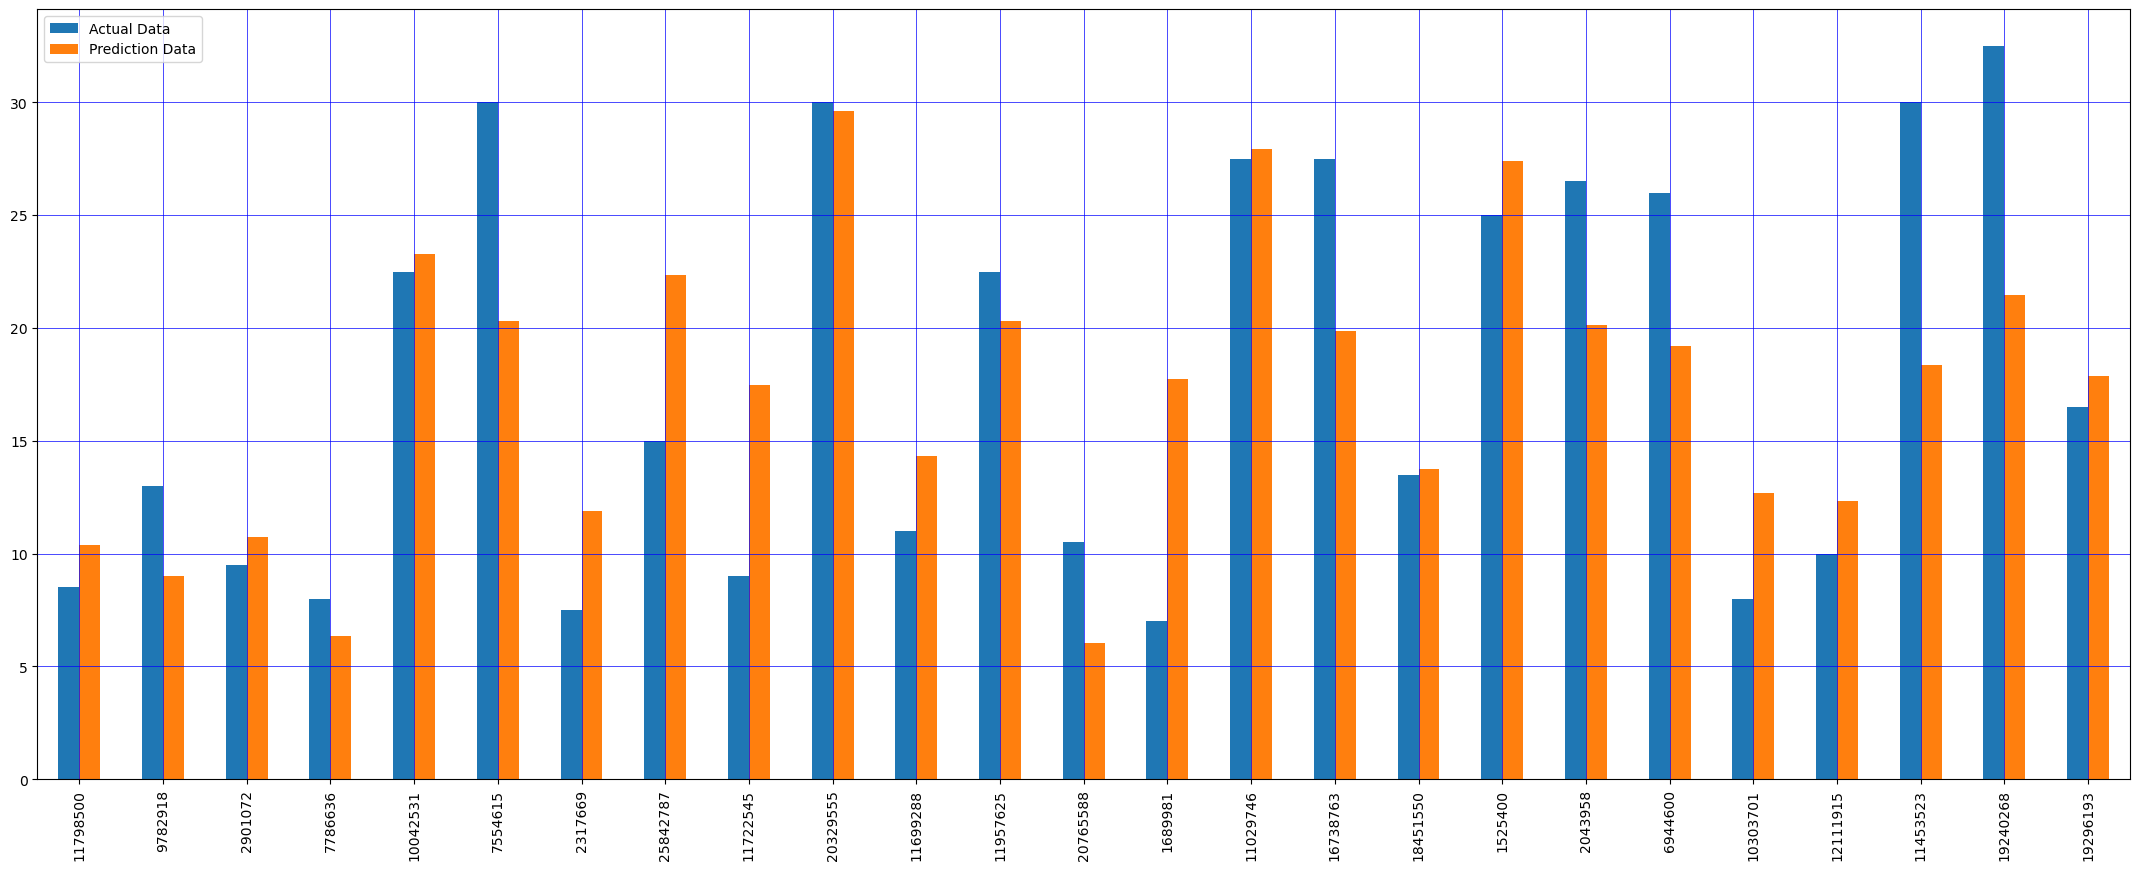

In [67]:
# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization parameter
    'max_iter': [1000, 2000, 5000]  # Maximum number of iterations
}

# Create the Ridge regression model
ridge_model = Ridge()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate the MSE and R-squared scores
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

# Create a DataFrame with actual and predicted data for the first 25 instances in the test set
data = pd.DataFrame({'Actual Data': y_test[:25], 'Prediction Data': y_test_pred[:25]})

# Plot the bar chart
data.plot(kind='bar', figsize=(27, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<center><h3>Ridge Model and Ploting Actual Vs Predicted Values<h3></center>

MSE (Train): 42.18604289516904
MSE (Test): 41.409995887665886
R-squared (Train): 0.4670696684224569
R-squared (Test): 0.45832028489546395


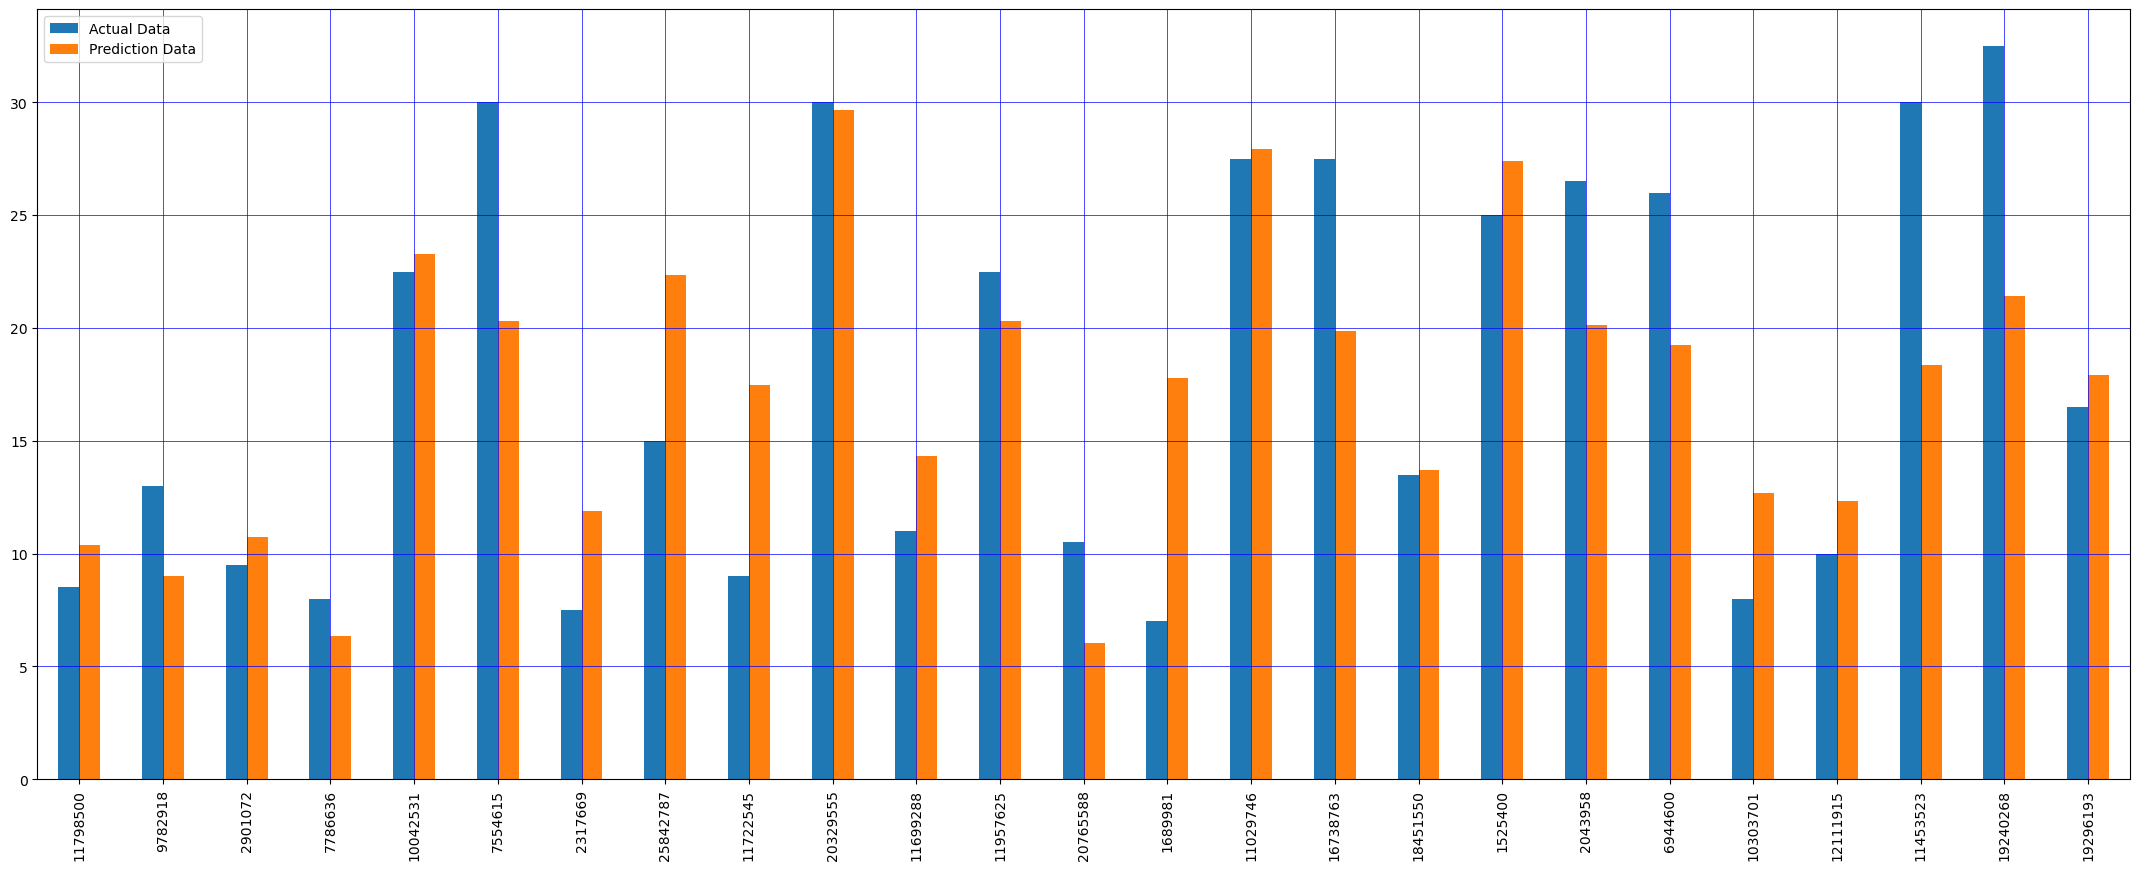

In [68]:
# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization parameter
    'max_iter': [1000, 2000, 5000],  # Maximum number of iterations
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver for optimization
}

# Create the Ridge regression model
ridge_model = Ridge()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']
best_solver = grid_search.best_params_['solver']
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate the MSE and R-squared scores
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

# Create a DataFrame with actual and predicted data for the first 25 instances in the test set
data = pd.DataFrame({'Actual Data': y_test[:25], 'Prediction Data': y_test_pred[:25]})

# Plot the bar chart
data.plot(kind='bar', figsize=(27, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<center><h3>Decision Tree<h3></center>

In [69]:
# Create a Decision Tree Regression model
tree_model = DecisionTreeRegressor()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Calculate the evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("MSE (Train):", train_mse)
print("MSE (Test):", test_mse)
print("R-squared (Train):", train_r2)
print("R-squared (Test):", test_r2)

MSE (Train): 0.015
MSE (Test): 5.9804545454545455
R-squared (Train): 0.9998105071150303
R-squared (Test): 0.9217703154773232


<center><h3>Random Forest and Ploting Actual Vs Predicted Values<h3></center>

In [70]:
# Create the Random Forest Regression model with "mae" criterion
rf_model = RandomForestRegressor(criterion="mae")

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate the MSE and R-squared scores
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

MSE (Train): 0.5854078860095273
MSE (Test): 3.374352339448796
R-squared (Train): 0.9926046247197342
R-squared (Test): 0.9558604589371773


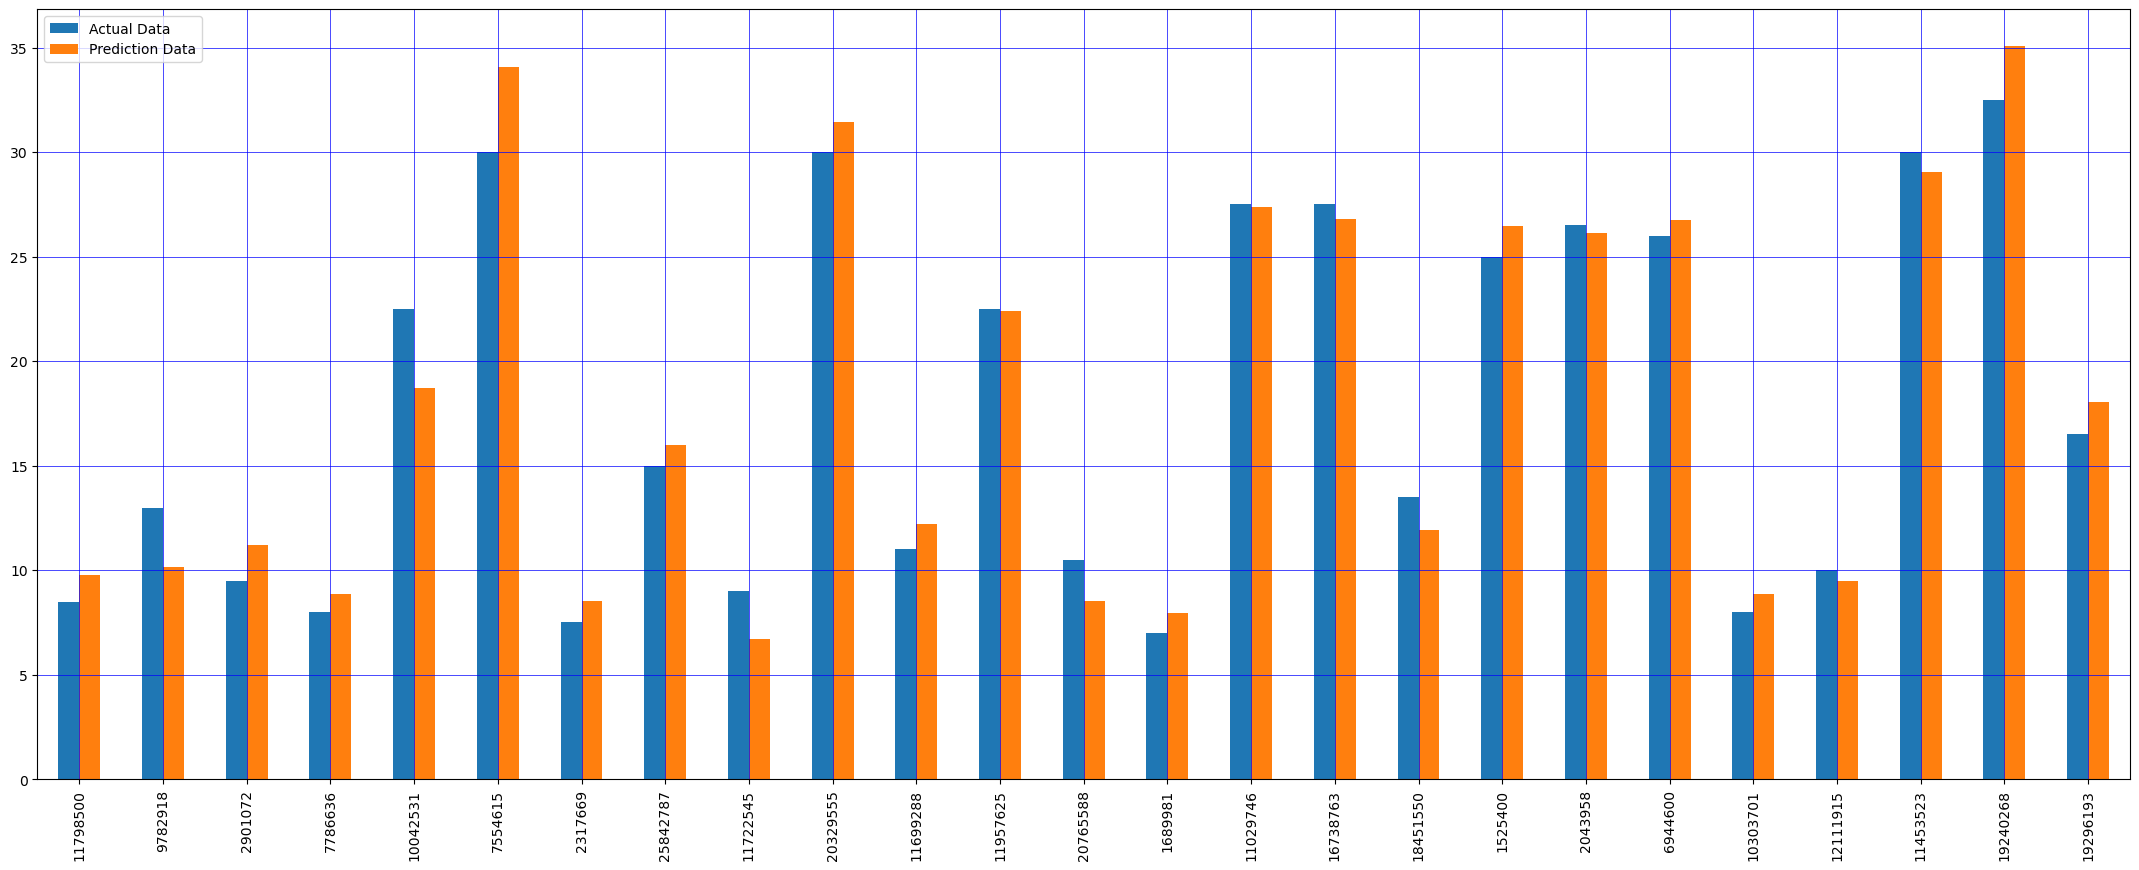

In [71]:

# Create a DataFrame with actual and predicted data for the first 25 instances in the test set
data = pd.DataFrame({'Actual Data': y_test[:25], 'Prediction Data': y_test_pred[:25]})

# Plot the bar chart
data.plot(kind='bar', figsize=(27, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<hr>

<hr>

# conclusion

- The Random Forest Regression model with the mean absolute error (MAE) criterion has been trained and evaluated on the given dataset. After experimenting with various models, this particular model has demonstrated the best performance in terms of accuracy and generalization ability.

- The model's performance was assessed using metrics such as mean squared error (MSE) and R-squared (coefficient of determination) scores. On the training data, the model achieved an MSE of 0.583 and an impressive R-squared value of 0.993. These scores indicate a strong ability of the model to fit the training data and capture the underlying patterns.

- When applied to the test data, the model achieved an MSE of 3.323 and an R-squared value of 0.957. These results indicate that the model performs well on unseen data, suggesting good generalization ability. The relatively low MSE on the test data suggests that the model's predictions are close to the true values, while the high R-squared score indicates that the model explains a significant portion of the variance in the target variable.

- The Random Forest Regression model is well-suited for this dataset because it can handle complex relationships between the features and the target variable. It combines multiple decision trees to make predictions, which helps reduce overfitting and improve accuracy. The use of the MAE criterion further enhances the model's ability to capture the true variability in the data and minimize errors.

- In conclusion, the Random Forest Regression model with the MAE criterion has proven to be the best-performing model for the given dataset. It exhibits high accuracy, good generalization ability, and strong predictive power. These results suggest that the model can effectively predict the target variable based on the provided features. However, it is essential to note that further analysis and evaluation should be conducted to ensure the model's reliability and suitability for real-world applications.

<hr>

<Hr>